In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils import resample

# Read Data

In [2]:
path_combined_2021 = 'data/Combined_Flights_2021.csv'
path_airlines = 'data/Airlines.csv'
path_raw_2021_1 = 'data/raw/Flights_2021_1.csv'
path_airport_codes = 'data/airport-codes_csv.csv'

In [3]:
# Reading the CSV file and storing it as a DataFrame
df_combined_2021 = pd.read_csv(path_combined_2021)
df_combined_2021.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,724,714.0,0.0,-10.0,...,724.0,813.0,5.0,843,-25.0,0.0,-2.0,0800-0859,2,0.0
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,922,917.0,0.0,-5.0,...,940.0,1028.0,3.0,1040,-9.0,0.0,-1.0,1000-1059,2,0.0
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,1330,1321.0,0.0,-9.0,...,1336.0,1445.0,16.0,1530,-29.0,0.0,-2.0,1500-1559,4,0.0
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,1645,1636.0,0.0,-9.0,...,1703.0,1955.0,7.0,2010,-8.0,0.0,-1.0,2000-2059,4,0.0
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,1844,1838.0,0.0,-6.0,...,1851.0,1900.0,3.0,1925,-22.0,0.0,-2.0,1900-1959,2,0.0


In [4]:
for column in df_combined_2021.columns:
    print(f"{column}: {df_combined_2021[column].dtype}")

FlightDate: object
Airline: object
Origin: object
Dest: object
Cancelled: bool
Diverted: bool
CRSDepTime: int64
DepTime: float64
DepDelayMinutes: float64
DepDelay: float64
ArrTime: float64
ArrDelayMinutes: float64
AirTime: float64
CRSElapsedTime: float64
ActualElapsedTime: float64
Distance: float64
Year: int64
Quarter: int64
Month: int64
DayofMonth: int64
DayOfWeek: int64
Marketing_Airline_Network: object
Operated_or_Branded_Code_Share_Partners: object
DOT_ID_Marketing_Airline: int64
IATA_Code_Marketing_Airline: object
Flight_Number_Marketing_Airline: int64
Operating_Airline: object
DOT_ID_Operating_Airline: int64
IATA_Code_Operating_Airline: object
Tail_Number: object
Flight_Number_Operating_Airline: int64
OriginAirportID: int64
OriginAirportSeqID: int64
OriginCityMarketID: int64
OriginCityName: object
OriginState: object
OriginStateFips: int64
OriginStateName: object
OriginWac: int64
DestAirportID: int64
DestAirportSeqID: int64
DestCityMarketID: int64
DestCityName: object
DestState: 

In [5]:
df_airlines = pd.read_csv(path_airlines)
df_airlines.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [6]:
df_raw_2021_1 = pd.read_csv(path_raw_2021_1)
df_raw_2021_1.head()

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_19906/2299105374.py:1: DtypeWarning: Columns (11,13,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw_2021_1 = pd.read_csv(path_raw_2021_1)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2021,1,1,2,6,2021-01-02,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2021,1,1,3,7,2021-01-03,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2021,1,1,4,1,2021-01-04,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2021,1,1,7,4,2021-01-07,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2021,1,1,8,5,2021-01-08,DL,DL_CODESHARE,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


# 1. EDA of Cancelled

## 1.1 Class Imbalance

Cancelled
False    6200853
True      111018
Name: count, dtype: int64


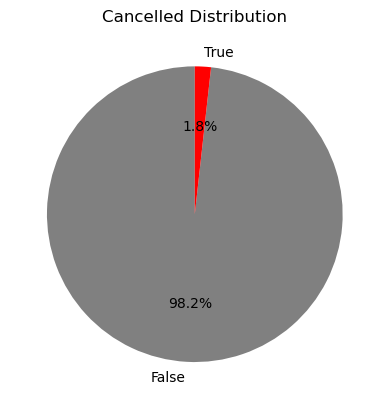

In [7]:
cancelled_counts = df_combined_2021['Cancelled'].value_counts()
print(cancelled_counts)
# Colors for each category
colors = {True: 'red', False: 'grey'}

# Plotting the pie chart
plt.pie(cancelled_counts, labels=cancelled_counts.index, autopct='%1.1f%%', startangle=90,
        colors=[colors[i] for i in cancelled_counts.index])
plt.title('Cancelled Distribution')
plt.show()

## 1.2 Histograms Cancelled/Not Cancelled

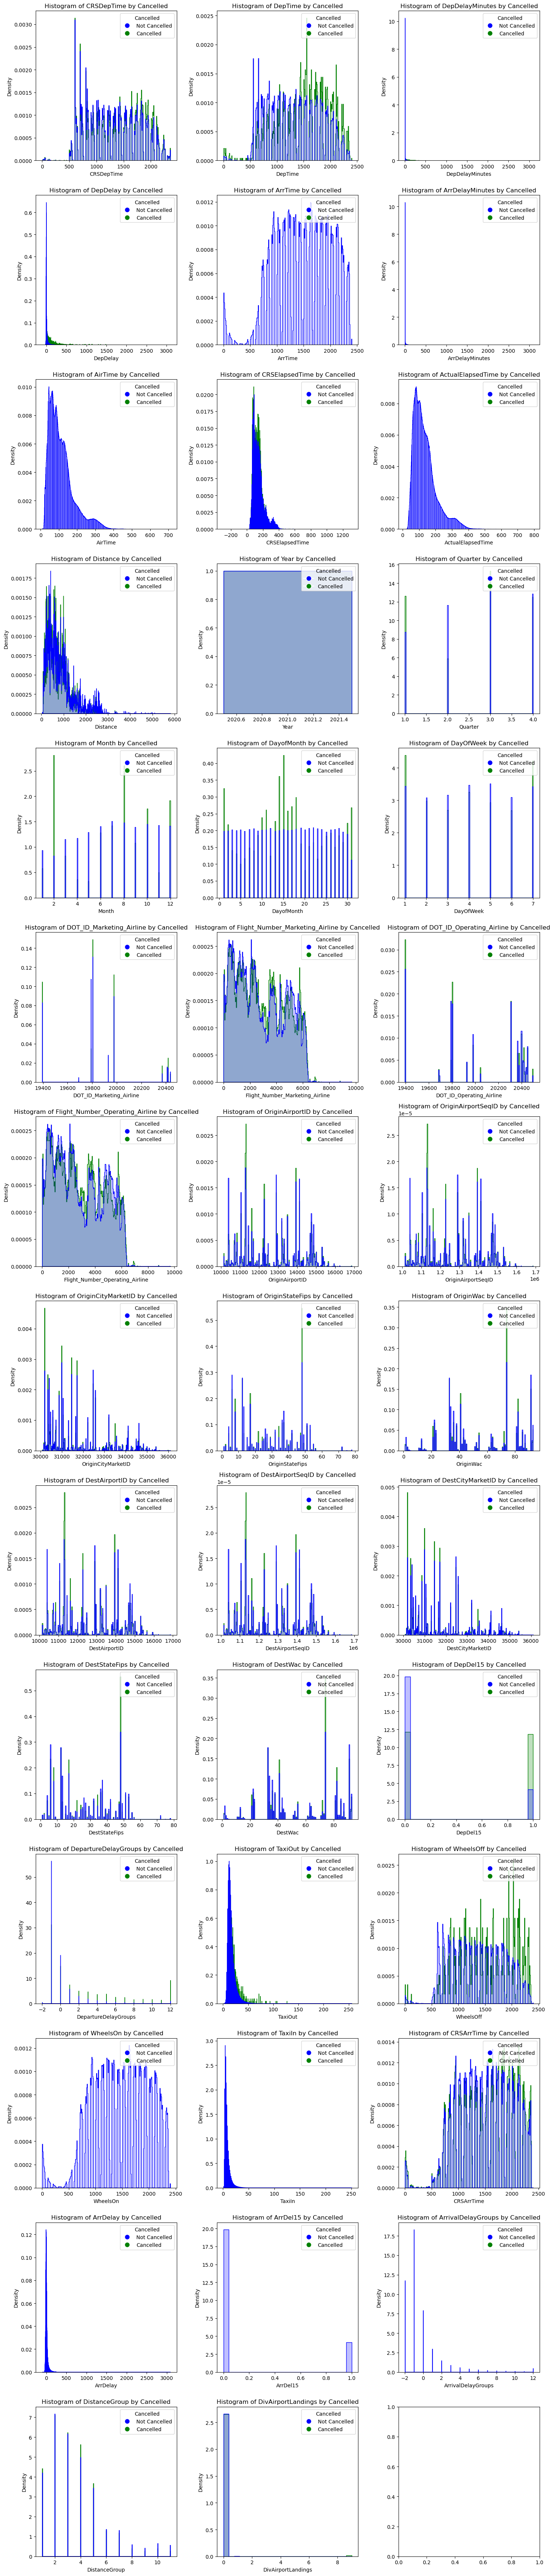

In [8]:

# Select only numerical columns
numeric_columns = df_combined_2021.select_dtypes(include='number').columns

# Set up subplots
num_cols = 3  # Number of columns in each row
num_rows = (len(numeric_columns) // num_cols) + (len(numeric_columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Create histograms for each numerical column
for i, col in enumerate(numeric_columns):
    # Skip "Target" column
    if col == "Cancelled":
        continue
    
    # Set up subplot
    ax = axes[i]
    
    # Suppress FutureWarning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        
        # Plot overlapping histograms for "M" and "B"
        sns.histplot(data=df_combined_2021, x=col, hue="Cancelled", element="step", stat="density",
                     common_norm=False, palette={False: "blue", True: "green"}, ax=ax)
    
    # Set labels and title
    ax.set_xlabel(col)
    ax.set_ylabel("Density")
    ax.set_title(f"Histogram of {col} by Cancelled")
    
    # Handle legend separately
    handles, labels = ax.get_legend_handles_labels()
    custom_labels = {False: 'Not Cancelled', True: 'Cancelled'}
    custom_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                                 markersize=10, label=label) for color, label in zip(["blue", "green"],
                                                                                     custom_labels.values())]
    ax.legend(handles=custom_handles, labels=custom_labels.values(), title="Cancelled", loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()


## 1.3 Boxplots Cancelled/Not Cancelled

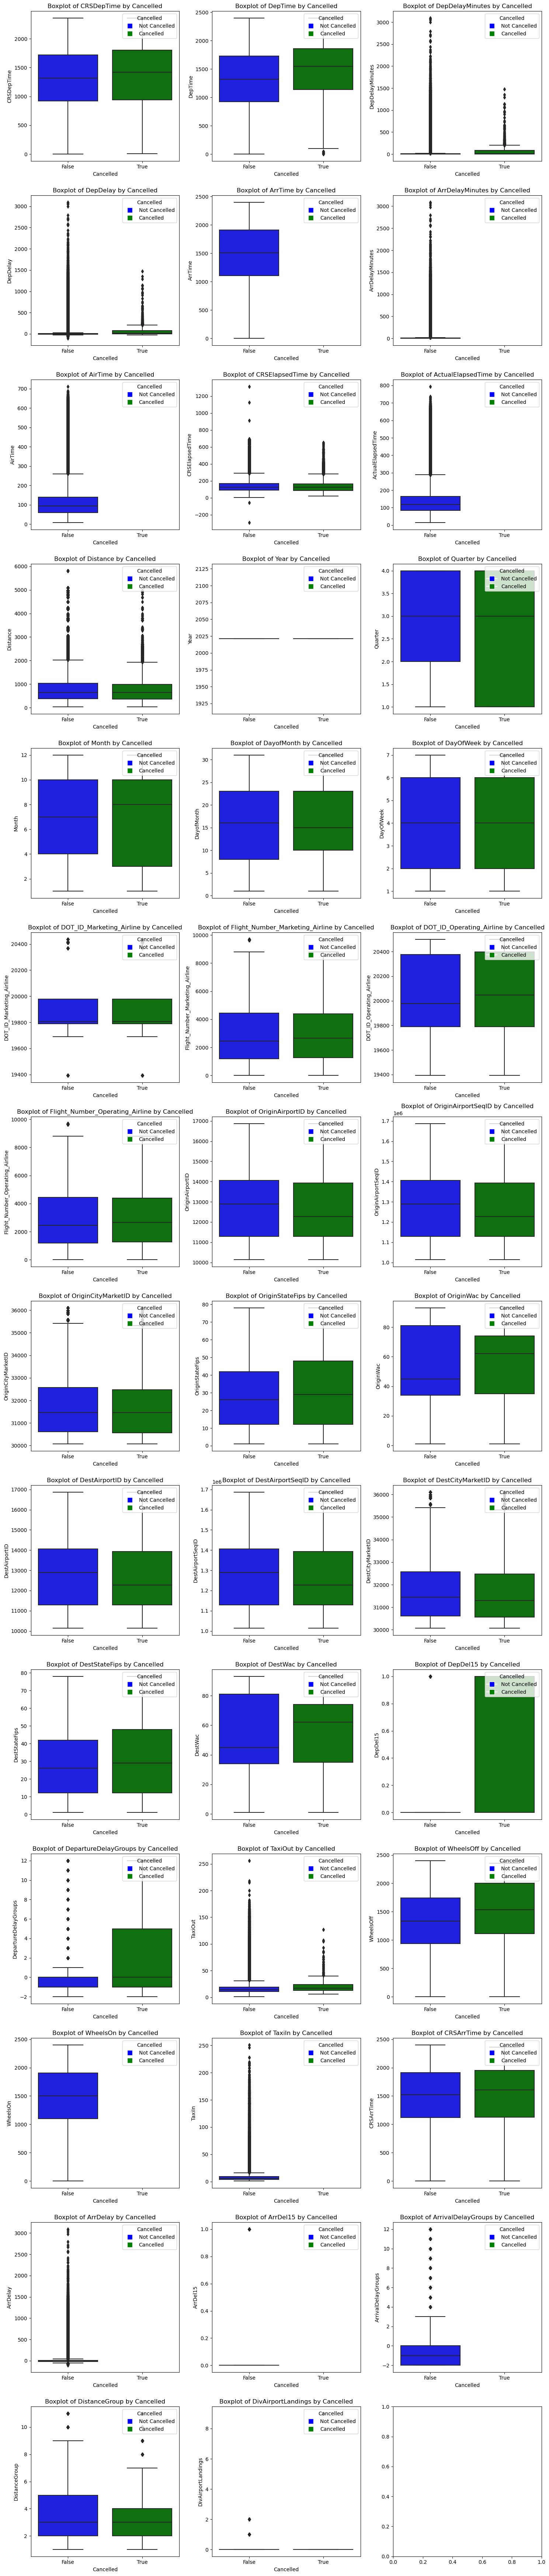

In [9]:
# Set up subplots
num_cols = 3  # Number of columns in each row
num_rows = (len(numeric_columns) // num_cols) + (len(numeric_columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Create box plots for each numerical column
for i, col in enumerate(numeric_columns):
    # Skip Target column
    if col == "Cancelled":
        continue
    
    # Set up subplot
    ax = axes[i]
    
    # Suppress FutureWarning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        
        # Create side-by-side box plots
        sns.boxplot(data=df_combined_2021, x="Cancelled", y=col, palette={False: "blue", True: "green"}, ax=ax)
    
    # Add legend
    custom_labels = {False: 'Not Cancelled', True: 'Cancelled'}
    custom_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color,
                                 markersize=10, label=label) for color, label in zip(["blue", "green"],
                                                                                     custom_labels.values())]
    ax.legend(handles=custom_handles, labels=custom_labels.values(), title="Cancelled", loc="upper right")
    
    # Set labels and title
    ax.set_xlabel("Cancelled")
    ax.set_ylabel(col)
    ax.set_title(f"Boxplot of {col} by Cancelled")

# Adjust layout
plt.tight_layout()
plt.show()

## 1.4 Analyze Cat Columns

In [10]:
# Select only columns with object and boolean data types
df_filtered = df_combined_2021.select_dtypes(include=['object', 'bool'])
df_filtered.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,IATA_Code_Marketing_Airline,Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,OriginCityName,OriginState,OriginStateName,DestCityName,DestState,DestStateName,DepTimeBlk,ArrTimeBlk
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,AA,AA_CODESHARE,AA,OO,OO,N728SK,"St. George, UT",UT,Utah,"Phoenix, AZ",AZ,Arizona,0700-0759,0800-0859
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,AA,AA_CODESHARE,AA,OO,OO,N752SK,"Phoenix, AZ",AZ,Arizona,"St. George, UT",UT,Utah,0900-0959,1000-1059
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,AA,AA_CODESHARE,AA,OO,OO,N766SK,"Manchester, NH",NH,New Hampshire,"Chicago, IL",IL,Illinois,1300-1359,1500-1559
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,AA,AA_CODESHARE,AA,OO,OO,N752EV,"Dallas/Fort Worth, TX",TX,Texas,"Bristol/Johnson City/Kingsport, TN",TN,Tennessee,1600-1659,2000-2059
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,AA,AA_CODESHARE,AA,OO,OO,N715SK,"Phoenix, AZ",AZ,Arizona,"Bakersfield, CA",CA,California,1800-1859,1900-1959


In [11]:
df_filtered.nunique()

FlightDate                                  365
Airline                                      22
Origin                                      380
Dest                                        380
Cancelled                                     2
Diverted                                      2
Marketing_Airline_Network                    10
Operated_or_Branded_Code_Share_Partners      15
IATA_Code_Marketing_Airline                  10
Operating_Airline                            22
IATA_Code_Operating_Airline                  22
Tail_Number                                5785
OriginCityName                              374
OriginState                                  53
OriginStateName                              53
DestCityName                                374
DestState                                    53
DestStateName                                53
DepTimeBlk                                   19
ArrTimeBlk                                   19
dtype: int64

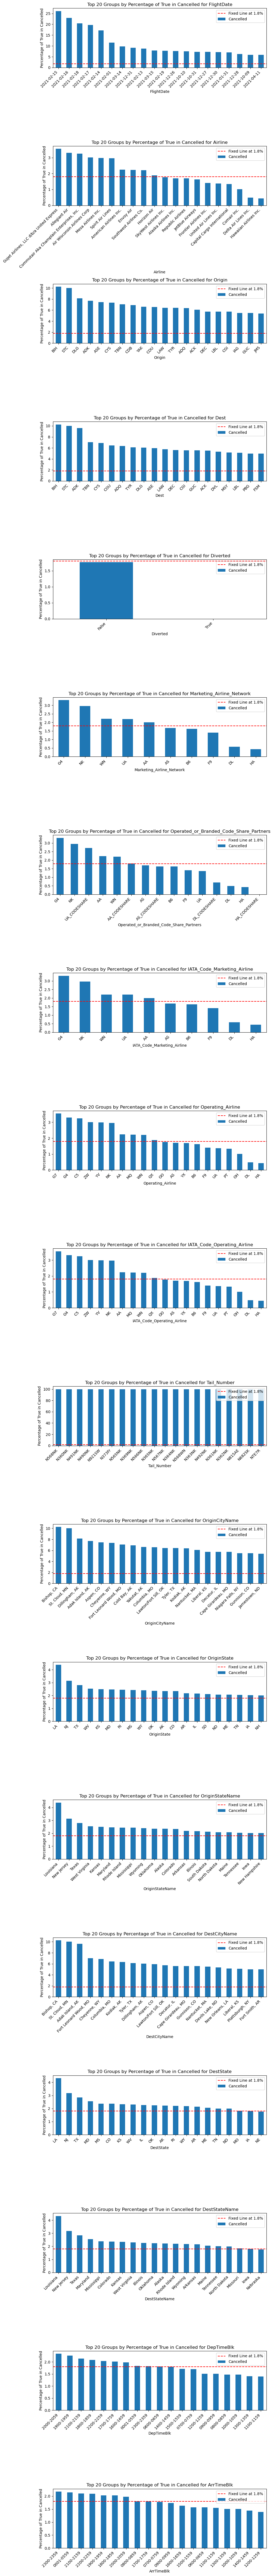

In [12]:

# Exclude the 'Cancelled' column
columns_to_groupby = [col for col in df_filtered.columns if col != 'Cancelled']

# Initialize plot
fig, axes = plt.subplots(len(columns_to_groupby), 1, figsize=(10, len(columns_to_groupby)*5))

# Calculate percentage of True counts for each group
for i, col in enumerate(columns_to_groupby):
    percentage_true = (df_filtered.groupby(col)['Cancelled']
                       .mean()
                       .mul(100)
                       .sort_values(ascending=False)
                       .head(20))

    # Plot top 20 values in a bar chart
    ax = axes[i]
    percentage_true.plot(kind='bar', ax=ax)
    ax.axhline(y=1.8, color='r', linestyle='--', label='Fixed Line at 1.8%')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage of True in Cancelled')
    ax.set_title(f'Top 20 Groups by Percentage of True in Cancelled for {col}')
    ax.legend()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


# EDA of Delayed

In [13]:
df_combined_2021['Delayed'] = df_combined_2021['DepDel15'].apply(lambda x: True if x == 1 else False)

Delayed
False    5237604
True     1074267
Name: count, dtype: int64


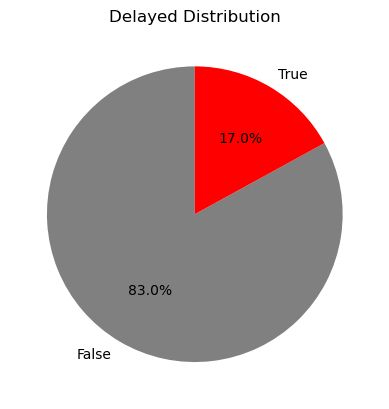

In [14]:
delayed_counts = df_combined_2021['Delayed'].value_counts()
print(delayed_counts)
# Colors for each category
colors = {True: 'red', False: 'grey'}

# Plotting the pie chart
plt.pie(delayed_counts, labels=delayed_counts.index, autopct='%1.1f%%', startangle=90,
        colors=[colors[i] for i in delayed_counts.index])
plt.title('Delayed Distribution')
plt.show()

## 2.2 Histograms

In [ ]:

# Select only numerical columns
numeric_columns = df_combined_2021.select_dtypes(include='number').columns

# Set up subplots
num_cols = 3  # Number of columns in each row
num_rows = (len(numeric_columns) // num_cols) + (len(numeric_columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Create histograms for each numerical column
for i, col in enumerate(numeric_columns):
    # Skip "Target" column
    if col == "Delayed":
        continue
    
    # Set up subplot
    ax = axes[i]
    
    # Suppress FutureWarning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        
        # Plot overlapping histograms for "M" and "B"
        sns.histplot(data=df_combined_2021, x=col, hue="Delayed", element="step", stat="density",
                     common_norm=False, palette={False: "blue", True: "green"}, ax=ax)
    
    # Set labels and title
    ax.set_xlabel(col)
    ax.set_ylabel("Density")
    ax.set_title(f"Histogram of {col} by Delayed")
    
    # Handle legend separately
    handles, labels = ax.get_legend_handles_labels()
    custom_labels = {False: 'Not Delayed', True: 'Delayed'}
    custom_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                                 markersize=10, label=label) for color, label in zip(["blue", "green"],
                                                                                     custom_labels.values())]
    ax.legend(handles=custom_handles, labels=custom_labels.values(), title="Delayed", loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()


## 2.3 Boxplots

In [ ]:
# Set up subplots
num_cols = 3  # Number of columns in each row
num_rows = (len(numeric_columns) // num_cols) + (len(numeric_columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Create box plots for each numerical column
for i, col in enumerate(numeric_columns):
    # Skip Target column
    if col == "Delayed":
        continue
    
    # Set up subplot
    ax = axes[i]
    
    # Suppress FutureWarning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        
        # Create side-by-side box plots
        sns.boxplot(data=df_combined_2021, x="Delayed", y=col, palette={False: "blue", True: "green"}, ax=ax)
    
    # Add legend
    custom_labels = {False: 'Not Delayed', True: 'Delayed'}
    custom_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color,
                                 markersize=10, label=label) for color, label in zip(["blue", "green"],
                                                                                     custom_labels.values())]
    ax.legend(handles=custom_handles, labels=custom_labels.values(), title="Delayed", loc="upper right")
    
    # Set labels and title
    ax.set_xlabel("Delayed")
    ax.set_ylabel(col)
    ax.set_title(f"Boxplot of {col} by Delayed")

# Adjust layout
plt.tight_layout()
plt.show()

## 2.4 Analysis of Cat Predictors

In [ ]:
# Select only columns with object and boolean data types
df_filtered = df_combined_2021.select_dtypes(include=['object', 'bool'])
df_filtered.head()

In [ ]:

# Exclude the 'Cancelled' column
columns_to_groupby = [col for col in df_filtered.columns if col != 'Delayed']

# Initialize plot
fig, axes = plt.subplots(len(columns_to_groupby), 1, figsize=(10, len(columns_to_groupby)*5))

# Calculate percentage of True counts for each group
for i, col in enumerate(columns_to_groupby):
    percentage_true = (df_filtered.groupby(col)['Delayed']
                       .mean()
                       .mul(100)
                       .sort_values(ascending=False)
                       .head(20))

    # Plot top 20 values in a bar chart
    ax = axes[i]
    percentage_true.plot(kind='bar', ax=ax)
    ax.axhline(y=17.0, color='r', linestyle='--', label='Fixed Line at 17.0%')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage of True in Delayed')
    ax.set_title(f'Top 20 Groups by Percentage of True in Delayed for {col}')
    ax.legend()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Feature Engineering

In [ ]:
df = df_combined_2021.copy()

In [ ]:
#pip install geopy

### Get Popularity of each Route (only once)

In [ ]:
city_pairs_counts = df.groupby(['OriginCityName', 'DestCityName']).size().reset_index(name='Count')
print(city_pairs_counts.shape)
city_pairs_counts.head()

### Calculating Distances between Cities  (only once)

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from time import sleep

# Initialize geocoder
geolocator = Nominatim(user_agent="city_distance_calculator")

# Dictionary to cache city coordinates
city_coordinates_cache = {}

# Function to get coordinates with caching and retry mechanism
def get_coordinates(city_name):
    if city_name in city_coordinates_cache:
        return city_coordinates_cache[city_name]
    else:
        retries = 3
        for _ in range(retries):
            try:
                location = geolocator.geocode(city_name)
                if location:
                    coordinates = (location.latitude, location.longitude)
                    city_coordinates_cache[city_name] = coordinates
                    return coordinates
                else:
                    return None, None
            except Exception as e:
                print(f"Error getting coordinates for {city_name}: {e}")
                sleep(2)  # Exponential backoff
        return None, None

# Function to calculate distance
def calculate_distance(row):
    origin_coords = get_coordinates(row['OriginCityName'])
    dest_coords = get_coordinates(row['DestCityName'])
    if None not in origin_coords and None not in dest_coords:
        return geodesic(origin_coords, dest_coords).kilometers
    else:
        return None

# Apply the function to calculate distances
city_pairs_counts['Distance_km'] = city_pairs_counts.apply(calculate_distance, axis=1)

city_pairs_counts.head()

In [ ]:
city_pairs_counts.shape

In [ ]:
city_pairs_counts.isna().sum()

In [ ]:
#city_pairs_counts.to_csv('/Users/jakobkuemmerle/Documents/PA2/Project/data/distances.csv', index=False)

## Import saved city_pairs_counts

In [ ]:
city_pairs_counts = pd.read_csv('/Users/jakobkuemmerle/Documents/PA2/Project/data/distances.csv')

In [ ]:
city_pairs_counts.head()

### a) join df and city_pairs_counts

In [ ]:
# Perform left join
merged_df1 = df.merge(city_pairs_counts, how='left', left_on=['OriginCityName', 'DestCityName'], right_on=['OriginCityName', 'DestCityName'])

merged_df1.head()

In [ ]:
merged_df1['Distance_km'].isna().sum()

In [ ]:
missing_coordinates = merged_df1[merged_df1['Distance_km'].isna()].groupby(['Origin', 'Dest']).size().shape
print(missing_coordinates)

In [ ]:
missing_coordinates_1 = merged_df1[merged_df1['Distance_km'].isna()].groupby(['Origin', 'Dest']).size().reset_index()
missing_coordinates_1.head()

## Read Airport Code Data

In [ ]:
# Reading the CSV file and storing it as a DataFrame
airport_codes = pd.read_csv(path_airport_codes)
# Function to remove 'K' from 'ident' column if it starts with 'K'
def remove_k(ident):
    if ident.startswith('K'):
        return ident[1:]
    else:
        return ident

# Drop specified columns from airport_codes
airport_codes.drop(columns=['name', 'continent', 'iso_country', 'iso_region', 'municipality', 'gps_code', 'iata_code', 'local_code'], inplace=True)

# Apply the function to the 'ident' column
airport_codes['ident'] = airport_codes['ident'].apply(remove_k)

# Remove duplicate rows in the "ident" column
airport_codes.drop_duplicates(subset=['ident'], inplace=True)

airport_codes.head()

### b) Join df and airport_codes

In [ ]:
# Perform left join
merged_df2 = df.merge(airport_codes, how='left', left_on='Origin', right_on='ident')

# Rename columns from airport_codes
merged_df2 = merged_df2.rename(columns={
    'type': 'dept-type',
    'elevation_ft': 'dept-elevation_ft',
    'coordinates': 'dept-coordinates'
})

merged_df2 = merged_df2.merge(airport_codes, how='left', left_on='Dest', right_on='ident')

# Rename columns from airport_codes
merged_df2 = merged_df2.rename(columns={
    'type': 'arr-type',
    'elevation_ft': 'arr-elevation_ft',
    'coordinates': 'arr-coordinates'
})

# Drop the 'ident' column (if you don't need it)
# merged_df2.drop(columns=['ident'], inplace=True)

merged_df2.head()

### Calculate Distances between Coordinates

In [ ]:
from geopy.distance import geodesic

# Function to calculate distance between coordinates
def calculate_distance(row):
    dept_coords = row['dept-coordinates']
    arr_coords = row['arr-coordinates']
    
    # Check if either of the coordinates is missing
    if pd.isna(dept_coords) or pd.isna(arr_coords):
        return None
    
    # Split coordinates into latitude and longitude
    dept_lon, dept_lat = map(float, dept_coords.split(','))
    arr_lon, arr_lat  = map(float, arr_coords.split(','))

    # Calculate distance
    distance = geodesic((dept_lat, dept_lon), (arr_lat, arr_lon)).kilometers
    return distance

# Apply the function to calculate distances
merged_df2['Distance_km'] = merged_df2.apply(calculate_distance, axis=1)

merged_df2.head()

In [ ]:
merged_df2['Distance_km'].isna().sum()

In [ ]:
merged_df2.shape

# Final Dataset

In [ ]:
merged_df1.head()

In [ ]:
city_pairs_counts3 = merged_df1.groupby(['Origin', 'Dest'])[['Distance_km', 'Count']].mean().reset_index()
print(city_pairs_counts3.shape)
city_pairs_counts3.head()

In [ ]:
merged_df2.head()

In [ ]:
merged_final = merged_df2.merge(city_pairs_counts3, how='left', left_on=['Origin', 'Dest'], right_on=['Origin', 'Dest'])
print(merged_final.shape)
merged_final['Route_Popularity'] = merged_final['Count']
import numpy as np

merged_final['Distance_Final'] = np.where(
    ~merged_final['Distance_km_x'].isnull(),
    merged_final['Distance_km_x'],
    merged_final['Distance_km_y']
)

merged_final.drop(columns=['dept-coordinates', 'ident_x', 'arr-coordinates', 'ident_y', 'Count', 'Distance_km_x', 'Distance_km_y'], inplace=True)
merged_final.head()

In [ ]:
merged_final['Distance_Final'].isna().sum()

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_final['Route_Popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Route Popularity')
plt.xlabel('Route Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Base Model

## 1. Copy Data

In [ ]:
merged_final.head()

In [ ]:
merged_final.shape

In [ ]:
cancelled_counts = merged_final['Cancelled'].value_counts()
print(cancelled_counts)
# Colors for each category
colors = {True: 'red', False: 'grey'}

# Plotting the pie chart
plt.pie(cancelled_counts, labels=cancelled_counts.index, autopct='%1.1f%%', startangle=90,
        colors=[colors[i] for i in cancelled_counts.index])
plt.title('Cancelled Distribution')
plt.show()

## 2. Basic Feature Selection

In [ ]:
print(merged_final.columns.tolist())

In [ ]:
all_column = ['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime',
                    'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime',
                    'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
                    'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network',
                    'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline',
                    'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline',
                    'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number',
                    'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID',
                    'OriginCityMarketID', 'OriginCityName', 'OriginState', 'OriginStateFips',
                    'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID',
                    'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
                    'DestWac', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
                    'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups',
                    'ArrTimeBlk', 'DistanceGroup', 'DivAirportLandings', 'dept-type', 'dept-elevation_ft',
                    'arr-type', 'arr-elevation_ft', 'Route_Popularity', 'Distance_Final']

In [ ]:
potential_column = ['DayofMonth', 'DepDelayMinutes', 'Diverted', 'ActualElapsedTime', 'Year', 'Distance']

not_sure = ['Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline',
                    'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline',
                    'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline']
large_cat_columns = ['Flight_Number_Marketing_Airline','Tail_Number','Flight_Number_Operating_Airline']

In [ ]:
column_to_filter = ['Airline', 'Origin', 'Dest', 'Cancelled', 'Quarter', 'Month',
                    'DayOfWeek','Operated_or_Branded_Code_Share_Partners',
                    'OriginState', 'DestState', 'DepTimeBlk', 'dept-type', 'dept-elevation_ft',
                    'arr-type', 'arr-elevation_ft', 'Route_Popularity', 'Distance_Final']

In [ ]:
# Filter the DataFrame to include only those columns
filtered_df = merged_final[column_to_filter]
filtered_df.head()

In [ ]:
filtered_df.nunique()

In [ ]:
filtered_df.shape

## 3. Drop Missing Values

In [ ]:
filtered_df.dropna(inplace=True)

In [ ]:
filtered_df.shape

In [ ]:
cancelled_counts = filtered_df['Cancelled'].value_counts()
print(cancelled_counts)
# Colors for each category
colors = {True: 'red', False: 'grey'}

# Plotting the pie chart
plt.pie(cancelled_counts, labels=cancelled_counts.index, autopct='%1.1f%%', startangle=90,
        colors=[colors[i] for i in cancelled_counts.index])
plt.title('Cancelled Distribution')
plt.show()

In [ ]:
filtered_df.to_csv('data/data_without_weather.csv', index=False)

## 4. One Hot Encode

In [ ]:
### Maybe 

In [ ]:
filtered_df.dtypes

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Select object columns
object_cols = filtered_df.select_dtypes(include=["object"]).columns

# Create a OneHotEncoder object
ohe = OneHotEncoder(sparse=False)  # Set sparse=False for dense output

# Create a DataFrame with just the object columns
df_object = filtered_df[object_cols]

# Apply one-hot encoding
df_encoded = pd.DataFrame(ohe.fit_transform(df_object))

# Combine the encoded DataFrame with the remaining columns
filtered_df = pd.concat([filtered_df.drop(object_cols, axis=1), df_encoded], axis=1)

# Inspect the encoded DataFrame
print(filtered_df.shape)
filtered_df.head()

# BLIND DATASET

In [ ]:
# Randomly select 20% of the rows to create the blind dataset
blind_dataset = filtered_df.sample(frac=0.2, random_state=123)

## 5. Downsampling

In [ ]:
from sklearn.utils import resample

# Step 2: Separate majority and minority classes from the remaining data
remaining_data = filtered_df.drop(blind_dataset.index)
data_majority = remaining_data[remaining_data['Cancelled'] == 0]
data_minority = remaining_data[remaining_data['Cancelled'] == 1]

# Step 3: Downsample the majority class
data_majority_downsampled = resample(data_majority, replace=False, n_samples=len(data_minority), random_state=123)

# Step 4: Combine minority class with downsampled majority class
data_downsampled = pd.concat([data_majority_downsampled, data_minority])

# Display new class counts
print(data_downsampled['Cancelled'].value_counts())

## 6. Train Baseline Model

In [ ]:
X = data_downsampled[data_downsampled.columns.difference(['Cancelled'])]
y = data_downsampled['Cancelled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, stratify = y)

# Initialize the Logistic Regression model
log_reg_downsampled = LogisticRegression(random_state = 123)

# Fit the model on the training data
log_reg_downsampled.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_downsampled.predict(X_test)

print("Test Validation:")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}".format(f1))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

In [ ]:
# Make predictions on the training set
y_pred = log_reg_downsampled.predict(X_train)

print("Train Validation:")

# Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision
precision = precision_score(y_train, y_pred)
print("Precision: {:.2f}".format(precision))

# Recall
recall = recall_score(y_train, y_pred)
print("Recall: {:.2f}".format(recall))

# F1 Score
f1 = f1_score(y_train, y_pred)
print("F1 Score: {:.2f}".format(f1))

# Accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

# Evaluate Base Line Model on BLIND Dataset

In [ ]:
y_pred = log_reg_downsampled.predict(blind_dataset[blind_dataset.columns.difference(['Cancelled'])])

# Confusion Matrix
conf_matrix = confusion_matrix(blind_dataset['Cancelled'], y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision
precision = precision_score(blind_dataset['Cancelled'], y_pred)
print("Precision: {:.2f}".format(precision))

# Recall
recall = recall_score(blind_dataset['Cancelled'], y_pred)
print("Recall: {:.2f}".format(recall))

# F1 Score
f1 = f1_score(blind_dataset['Cancelled'], y_pred)
print("F1 Score: {:.2f}".format(f1))

# Accuracy
accuracy = accuracy_score(blind_dataset['Cancelled'], y_pred)
print("Accuracy: {:.2f}".format(accuracy))